In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive inside a session. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# with Session(backend=service.backend("ibmq_qasm_simulator")):
#     result = Sampler().run(circuits).result()

# Exercise 1

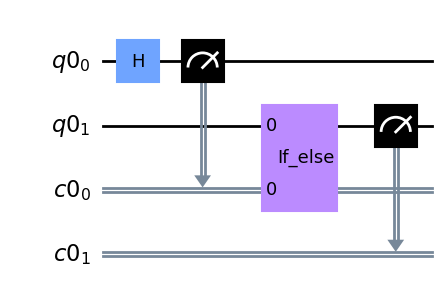

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

q0, q1 = qr
b0, b1 = cr

qc.h(q0)
qc.measure(q0, b0)

###
with qc.if_test((b0,0)) as else_:
    qc.x(q1)
with else_:
    qc.h(q1)
###

qc.measure(q1, b1)
qc.draw(output="mpl", idle_wires=False)


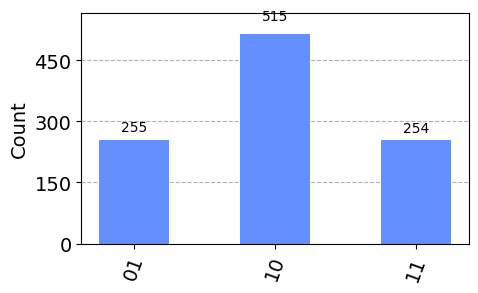

In [3]:
backend_sim = AerSimulator()

job_1 = backend_sim.run(qc)
result_1 = job_1.result()
counts_1 = result_1.get_counts()

display(plot_histogram(counts_1, figsize = (5,3)))

In [4]:
# Submit your circuit

from qc_grader.challenges.spring_2023 import grade_ex1b

grade_ex1b(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Exercise 2

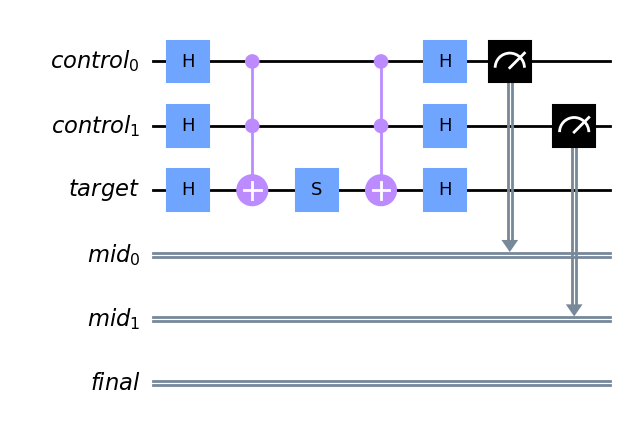

In [12]:
from qiskit import QuantumCircuit, Aer
from qiskit.visualization import plot_histogram
from qiskit.circuit import QuantumRegister, ClassicalRegister

controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")

mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)

def trial(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
):
    """Probabilistically perform Rx(theta) on the target, where cos(theta) = 3/5."""

    circuit.h(controls)
    circuit.h(target)
    circuit.ccx(controls[0], controls[1], target[0])
    circuit.s(target)
    circuit.ccx(controls[0], controls[1], target[0])
    circuit.h(controls)
    circuit.h(target)
    
    circuit.measure(controls[0],measures[0])
    circuit.measure(controls[1],measures[1])


qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
qc.draw(output="mpl", cregbundle=False)




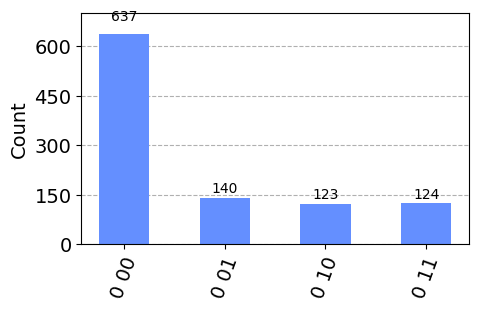

In [13]:
backend_sim = AerSimulator()

job_1 = backend_sim.run(qc)
result_1 = job_1.result()
counts_1 = result_1.get_counts()

# print(f"Counts: {counts_1}")
display(plot_histogram(counts_1, figsize = (5,3)))

In [14]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1c

grade_ex1c(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Exercise 3

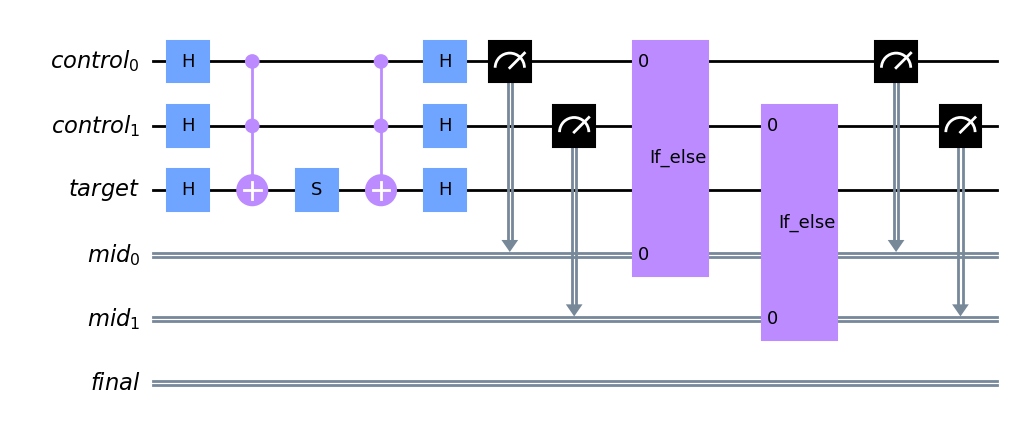

In [21]:
def reset_controls(
    circuit: QuantumCircuit, controls: QuantumRegister, measures: ClassicalRegister
):
    """Reset the control qubits if they are in |1>."""

    with circuit.if_test((measures[0],1)):
        circuit.x(controls[0])
    with circuit.if_test((measures[1],1)):
        circuit.x(controls[1])


qc = base.copy_empty_like()
trial(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

In [22]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1d

grade_ex1d(qc)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


# Exercise 4

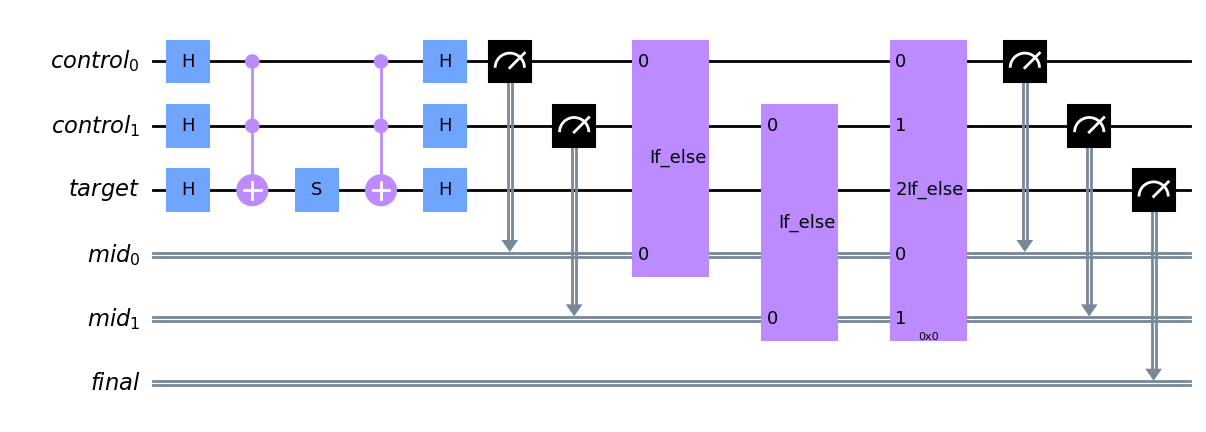

In [23]:
# Set the maximum number of trials
max_trials = 2

# Create a clean circuit with the same structure (bits, registers, etc)
# as the initial base we set up.
circuit = base.copy_empty_like()

# The first trial does not need to reset its inputs, since the controls
# are guaranteed to start in the |0> state.
trial(circuit, target, controls, mid_measure)

# Manually add the rest of the trials.  In the future, we will be
# able to use a dynamic `while` loop to do this, but for now, we
# statically add each loop iteration with a manual condition check
# on each one.  This involves more classical synchronizations than
# the while loop, but will suffice for now.
for _ in range(max_trials - 1):
    reset_controls(circuit, controls, mid_measure)
    with circuit.if_test((mid_measure, 0b00)) as else_:
        # This is the success path, but Qiskit can't directly
        # represent a negative condition yet, so we have an
        # empty `true` block in order to use the `else` branch.
        pass
    with else_:
        circuit.reset(target[0])
        trial(circuit, target, controls, mid_measure)
        
# We need to measure the control qubits again to ensure we
# get their final results; this is a hardware limitation.
circuit.measure(controls, mid_measure)

# Finally, let's measure our target, to check that we're
# getting the rotation we desired.
circuit.measure(target, final_measure)

circuit.draw("mpl", cregbundle=False)

In [24]:
# Submit your circuit
from qc_grader.challenges.spring_2023 import grade_ex1e

grade_ex1e(circuit)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


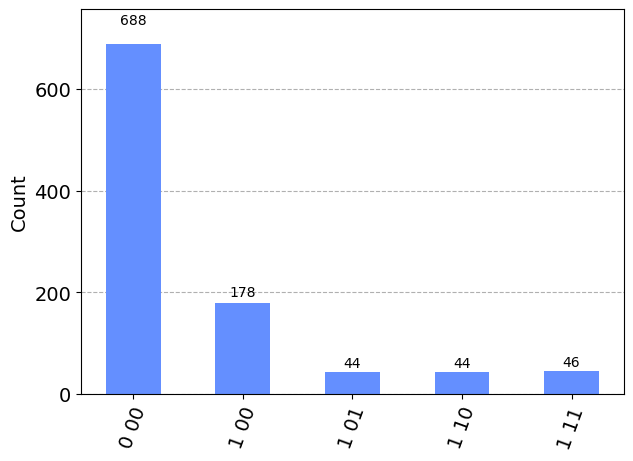

In [25]:
sim = AerSimulator()
job = sim.run(circuit, shots=1000)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)

In [30]:
from qiskit_ibm_provider import IBMProvider

provider = IBMProvider()

In [31]:
hub = "qc-spring-23-4"
group = "group-2"
project = "recBj5uAHU3T420hx"

backend_name = "ibm_"
backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")

Traceback (most recent call last):
  Cell In[31], line 6
    backend = provider.get_backend(backend_name, instance=f"{hub}/{group}/{project}")
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_provider.py:656 in get_backend
    backends = self.backends(name, instance=instance, **kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_provider.py:557 in backends
    return self._backend.backends(
  File /opt/conda/lib/python3.10/site-packages/qiskit_ibm_provider/ibm_backend_service.py:165 in backends
    raise QiskitBackendNotFoundError("No backend matches the criteria")
QiskitBackendNotFoundError: 'No backend matches the criteria'

Use %tb to get the full traceback.


In [ ]:
from qiskit import transpile

qc_transpiled = transpile(circuit, backend)
job = backend.run(qc_transpiled, shots=1000, dynamic=True)

In [ ]:
counts = job.result().get_counts()

plot_histogram(counts)